# Exercise 01 : Line chart with styles
* analyze only the users and not the admins
* analyze only the dates when there were both views and checker commits
* use size of the font should be 8
* the size of the figure is (15,8)

In [1]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('../data/logs.db')
cursor = connection.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
connection.commit()

pageview_query = """
SELECT datetime, uid
FROM pageviews
WHERE uid LIKE 'user_%'
"""
datetime = pd.io.sql.read_sql(pageview_query, connection)

checker_query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
timestamp = pd.io.sql.read_sql(checker_query, connection)

datetime_df = pd.DataFrame(datetime)
timestamp_df = pd.DataFrame(timestamp)
datetime_df['datetime'] = pd.to_datetime(datetime_df['datetime'])
timestamp_df['timestamp'] = pd.to_datetime(timestamp_df['timestamp'])
datetime_df['date'] = datetime_df['datetime'].dt.date
timestamp_df['commit_date'] = timestamp_df['timestamp'].dt.date

views_df = datetime_df.groupby('date').size().reset_index(name='views')
commit_df =timestamp_df.groupby('commit_date').size().reset_index(name= 'commits')

merged_df = pd.merge(views_df, commit_df, left_on='date', right_on='commit_date', how='inner')
print(merged_df)

connection.close()

          date  views commit_date  commits
0   2020-04-17      1  2020-04-17       23
1   2020-04-18     23  2020-04-18       69
2   2020-04-19     15  2020-04-19       33
3   2020-04-21      3  2020-04-21       25
4   2020-04-22      1  2020-04-22       28
5   2020-04-23      5  2020-04-23       43
6   2020-04-25      1  2020-04-25      104
7   2020-04-26      8  2020-04-26      261
8   2020-04-28      2  2020-04-28        5
9   2020-04-29      4  2020-04-29       17
10  2020-04-30      9  2020-04-30       53
11  2020-05-01      3  2020-05-01       60
12  2020-05-02      6  2020-05-02      242
13  2020-05-03     19  2020-05-03      180
14  2020-05-04      1  2020-05-04       37
15  2020-05-05      1  2020-05-05      139
16  2020-05-06      3  2020-05-06        2
17  2020-05-07      2  2020-05-07       52
18  2020-05-08     48  2020-05-08       87
19  2020-05-09     19  2020-05-09       86
20  2020-05-10    110  2020-05-10      143
21  2020-05-11    200  2020-05-11      186
22  2020-05

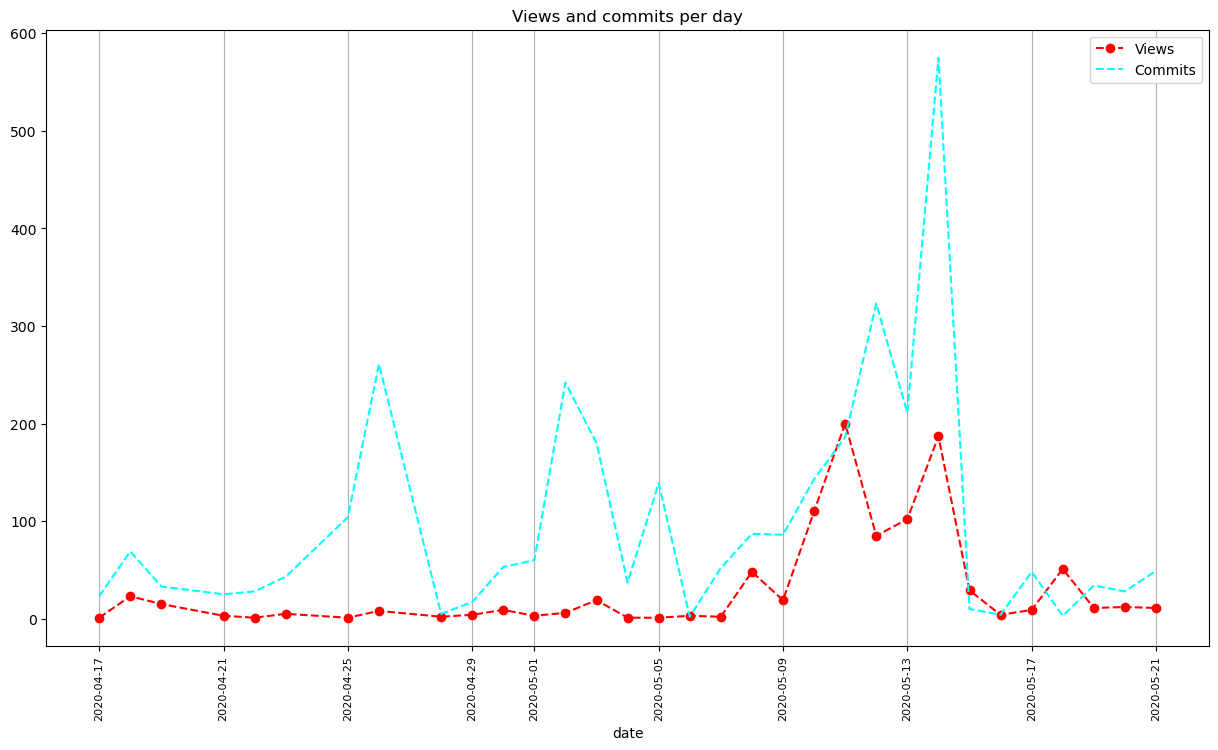

In [2]:
import matplotlib.pyplot as plt


plt.subplots(figsize=(15, 8))

plt.xlabel('date')
plt.plot(merged_df['date'], merged_df['views'], color='red', linestyle='--', marker='o', label='Views')
plt.plot(merged_df['date'], merged_df['commits'], color='Aqua', linestyle='--', label='Commits')
plt.legend()
plt.grid(axis='x')
plt.xticks(rotation=90, fontsize=8)
plt.title('Views and commits per day')

plt.show()

## How many times was the number of views larger than 150?

The answer is 2.